# Image Recognition with Tensorflow

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # y labels are oh-encoded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


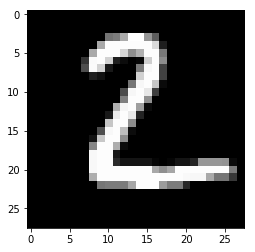

In [2]:
first_image = mnist.test.images[1]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.imsave('coba',pixels, cmap='gray')
plt.show()

In [3]:
n_train = mnist.train.num_examples # 55,000
n_validation = mnist.validation.num_examples # 5000
n_test = mnist.test.num_examples # 10,000

### Set the number of neuron per layer
- Jumlah n_input disesuiakan dengan jumlah piksel data (disini 28 x 28 = 784)
- Jumlah hidden layer menentukan kompleksitas arsitektur dan akurasi. Untuk menentukannya nanti tergantung dari kondisi yang dibutuhkan, serta kondisi perangkat yang dimiliki. Semakin besar arsitektur memerlukan pemrosesan yang semakin berat, tapi belum tentu memberikan akurasi yang lebih tinggi
- Jumlah output disesuaikan dengan berapa macam kelas pada data yang dimiliki. Data tersebut sebelumnya telah melalui proses one-hot encoding.

In [4]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
n_hidden3 = 128 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)

### Set hyperparameter
- learning rate adalah kecepatan dari pembelajaran, semakin kecil LR maka proses pembelajaran akan lebih detil tapi memerlukan proses yang lebih lama
- epoch / iterasi adalah banyaknya pengulangan
- batch size adalah banyaknya data yang diolah dalam satu kali epoch
- dropout (?)

In [5]:
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

In [6]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 

In [7]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

In [8]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [9]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [10]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

Iteration 0 	| Loss = 3.8872094 	| Accuracy = 0.1015625
Iteration 100 	| Loss = 0.44516617 	| Accuracy = 0.84375
Iteration 200 	| Loss = 0.36024094 	| Accuracy = 0.8515625
Iteration 300 	| Loss = 0.30645654 	| Accuracy = 0.921875
Iteration 400 	| Loss = 0.31600347 	| Accuracy = 0.921875
Iteration 500 	| Loss = 0.21711841 	| Accuracy = 0.9296875
Iteration 600 	| Loss = 0.30532497 	| Accuracy = 0.9140625
Iteration 700 	| Loss = 0.35393506 	| Accuracy = 0.90625
Iteration 800 	| Loss = 0.35425568 	| Accuracy = 0.9375
Iteration 900 	| Loss = 0.24301185 	| Accuracy = 0.9375


In [14]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9156


### Test image

In [15]:
img = np.invert(Image.open("test_3.jpg").convert('L')).ravel()

In [16]:
prediction = sess.run(tf.argmax(output_layer,1), feed_dict={X: [img]})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: 3
